# 001

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

READING DATA

In [2]:
titanic_dataset = pd.read_csv("C:/Users/AISHA/Desktop/Datasets/titanic.csv")

In [3]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


SUMMATION OF AGES

In [4]:
titanic_dataset["Age"].sum()

21205.17

MEASURES OF CENTRAL TENDENCY


In [5]:
# Mean

titanic_dataset["Age"].mean()

29.69911764705882

In [6]:
# Median

titanic_dataset["Age"].median()

28.0

In [7]:
# Mode

titanic_dataset["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [8]:
# Standard deviation

titanic_dataset["Age"].std()

14.526497332334042

FINDING MISSING VALUES

In [9]:
# The isnull menthod is a boolean method that returns True for an empty cell and False for a non empty cell

titanic_dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#To find the number of empty cells, the sum method is used with the isnull method to add the True values from the isnull output
# True = 1 and False = 0

titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

FINDING OUTLIERS

In [11]:
# Outliers are data points that differ significantly from other observations in a dataset
# Outliers can be found using Z-score or Interquartile range

In [12]:
# Z-score
# Z-score measures how many standard deviations a data point is from the mean
# Z-score = deviation divided by standard deviation
# deviation =data point minus mean
# A threshold is set (2 or 3)
# Z-score greater than threshold is an outlier


deviation = np.abs(titanic_dataset["Age"] - titanic_dataset["Age"].mean())
standard_deviation = titanic_dataset["Age"].std()

z_score = deviation/standard_deviation

threshold = 2

outlier = titanic_dataset["Age"][z_score > threshold]
print (outlier)

33     66.00
54     65.00
94     59.00
96     71.00
116    70.50
170    61.00
232    59.00
252    62.00
275    63.00
280    65.00
326    61.00
366    60.00
438    64.00
456    65.00
483    63.00
493    71.00
545    64.00
555    62.00
570    62.00
587    60.00
625    61.00
630    80.00
672    70.00
684    60.00
694    60.00
745    70.00
803     0.42
829    62.00
851    74.00
Name: Age, dtype: float64


In [13]:
# Interquartile range (IQR)
# Using IQR, an outlier is any data value below (Q1 - threshold*IQR) or above (Q3 + threshold*IQR)
# Q1 = 25th percentile, Q3 = 75th percentile, IQR = Q3 - Q1
# threshold = 1.5


Q1 = titanic_dataset["Age"].quantile(0.25)
Q3 = titanic_dataset["Age"].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outlier = titanic_dataset["Age"][(titanic_dataset["Age"] < Q1 - threshold*IQR) | (titanic_dataset["Age"] > Q3 + threshold*IQR)]
print (outlier)

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


EXPLORATIVE DATA ANALYSIS (EDA)

In [14]:
# Overview

titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# Central tendencies

titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Null values

titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Unique values

titanic_dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [18]:
# Sort by a column(in ascending order)

titanic_dataset.sort_values(by="Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [19]:
# Sort by a column and get the information in the head

titanic_dataset.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [20]:
# Sort by a column and give a specific number of valuees(10)

titanic_dataset.sort_values(by="Age").head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


In [21]:
# Sort by a column (in descending order)

titanic_dataset.sort_values(by = "Age", ascending = False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [22]:
# Correlation between two columns

titanic_dataset["Age"].corr(titanic_dataset["Survived"])

-0.07722109457217756

In [23]:
titanic_dataset["Pclass"].corr(titanic_dataset["Survived"])

-0.3384810359610148

In [24]:
# Correlation among more than two columns
# Using matrix

titanic_dataset[["Age", "Survived", "Pclass"]].corr()

,Age,Survived,Pclass
Age,1.000000,-0.077221,-0.369226
Survived,-0.077221,1.000000,-0.338481
Pclass,-0.369226,-0.338481,1.000000


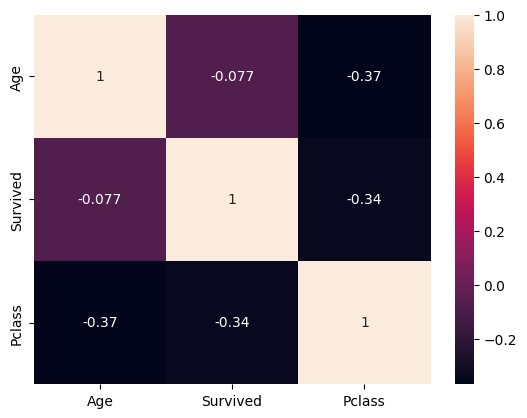

In [25]:
# Visualisation of correlation

sns.heatmap(titanic_dataset[["Age", "Survived", "Pclass"]].corr(),annot=True)
plt.show()

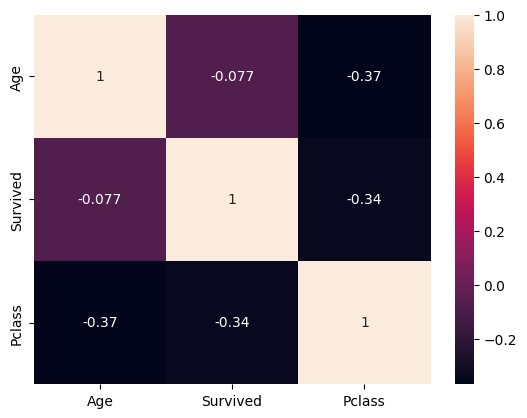

In [26]:
# To increase the size of the plot

sns.heatmap(titanic_dataset [["Age", "Survived", "Pclass"]].corr(), annot= True)
plt.rcParams["figure.figsize"]= (10,7)

In [27]:
# Grouping columns

group = titanic_dataset.groupby("Age")
sgroup = group.count()
print(sgroup)

       PassengerId  Survived  Pclass  Name  Sex  SibSp  Parch  Ticket  Fare  \
Age                                                                           
0.42             1         1       1     1    1      1      1       1     1   
0.67             1         1       1     1    1      1      1       1     1   
0.75             2         2       2     2    2      2      2       2     2   
0.83             2         2       2     2    2      2      2       2     2   
0.92             1         1       1     1    1      1      1       1     1   
...            ...       ...     ...   ...  ...    ...    ...     ...   ...   
70.00            2         2       2     2    2      2      2       2     2   
70.50            1         1       1     1    1      1      1       1     1   
71.00            2         2       2     2    2      2      2       2     2   
74.00            1         1       1     1    1      1      1       1     1   
80.00            1         1       1     1    1     

In [28]:
# Transposition of dataset

titanic_dataset.transpose()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


<Axes: >

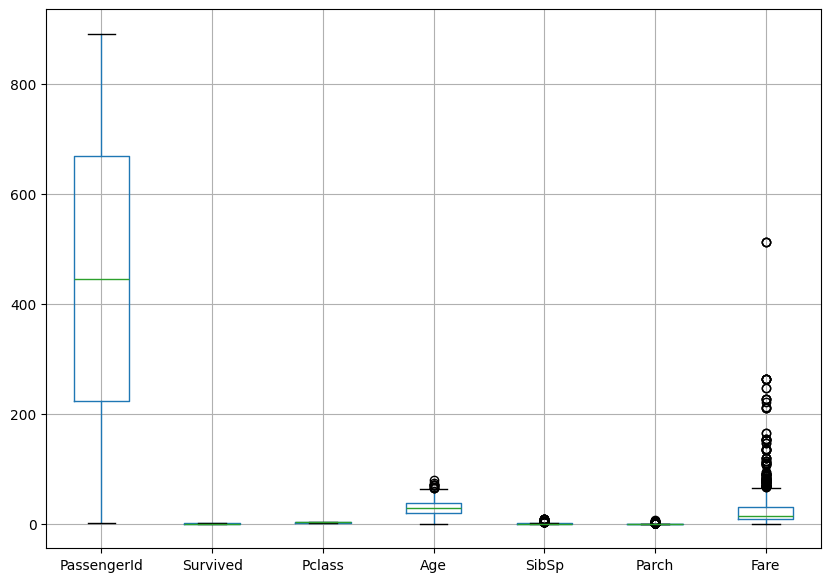

In [29]:
# Boxplot

titanic_dataset.boxplot()

<Axes: >

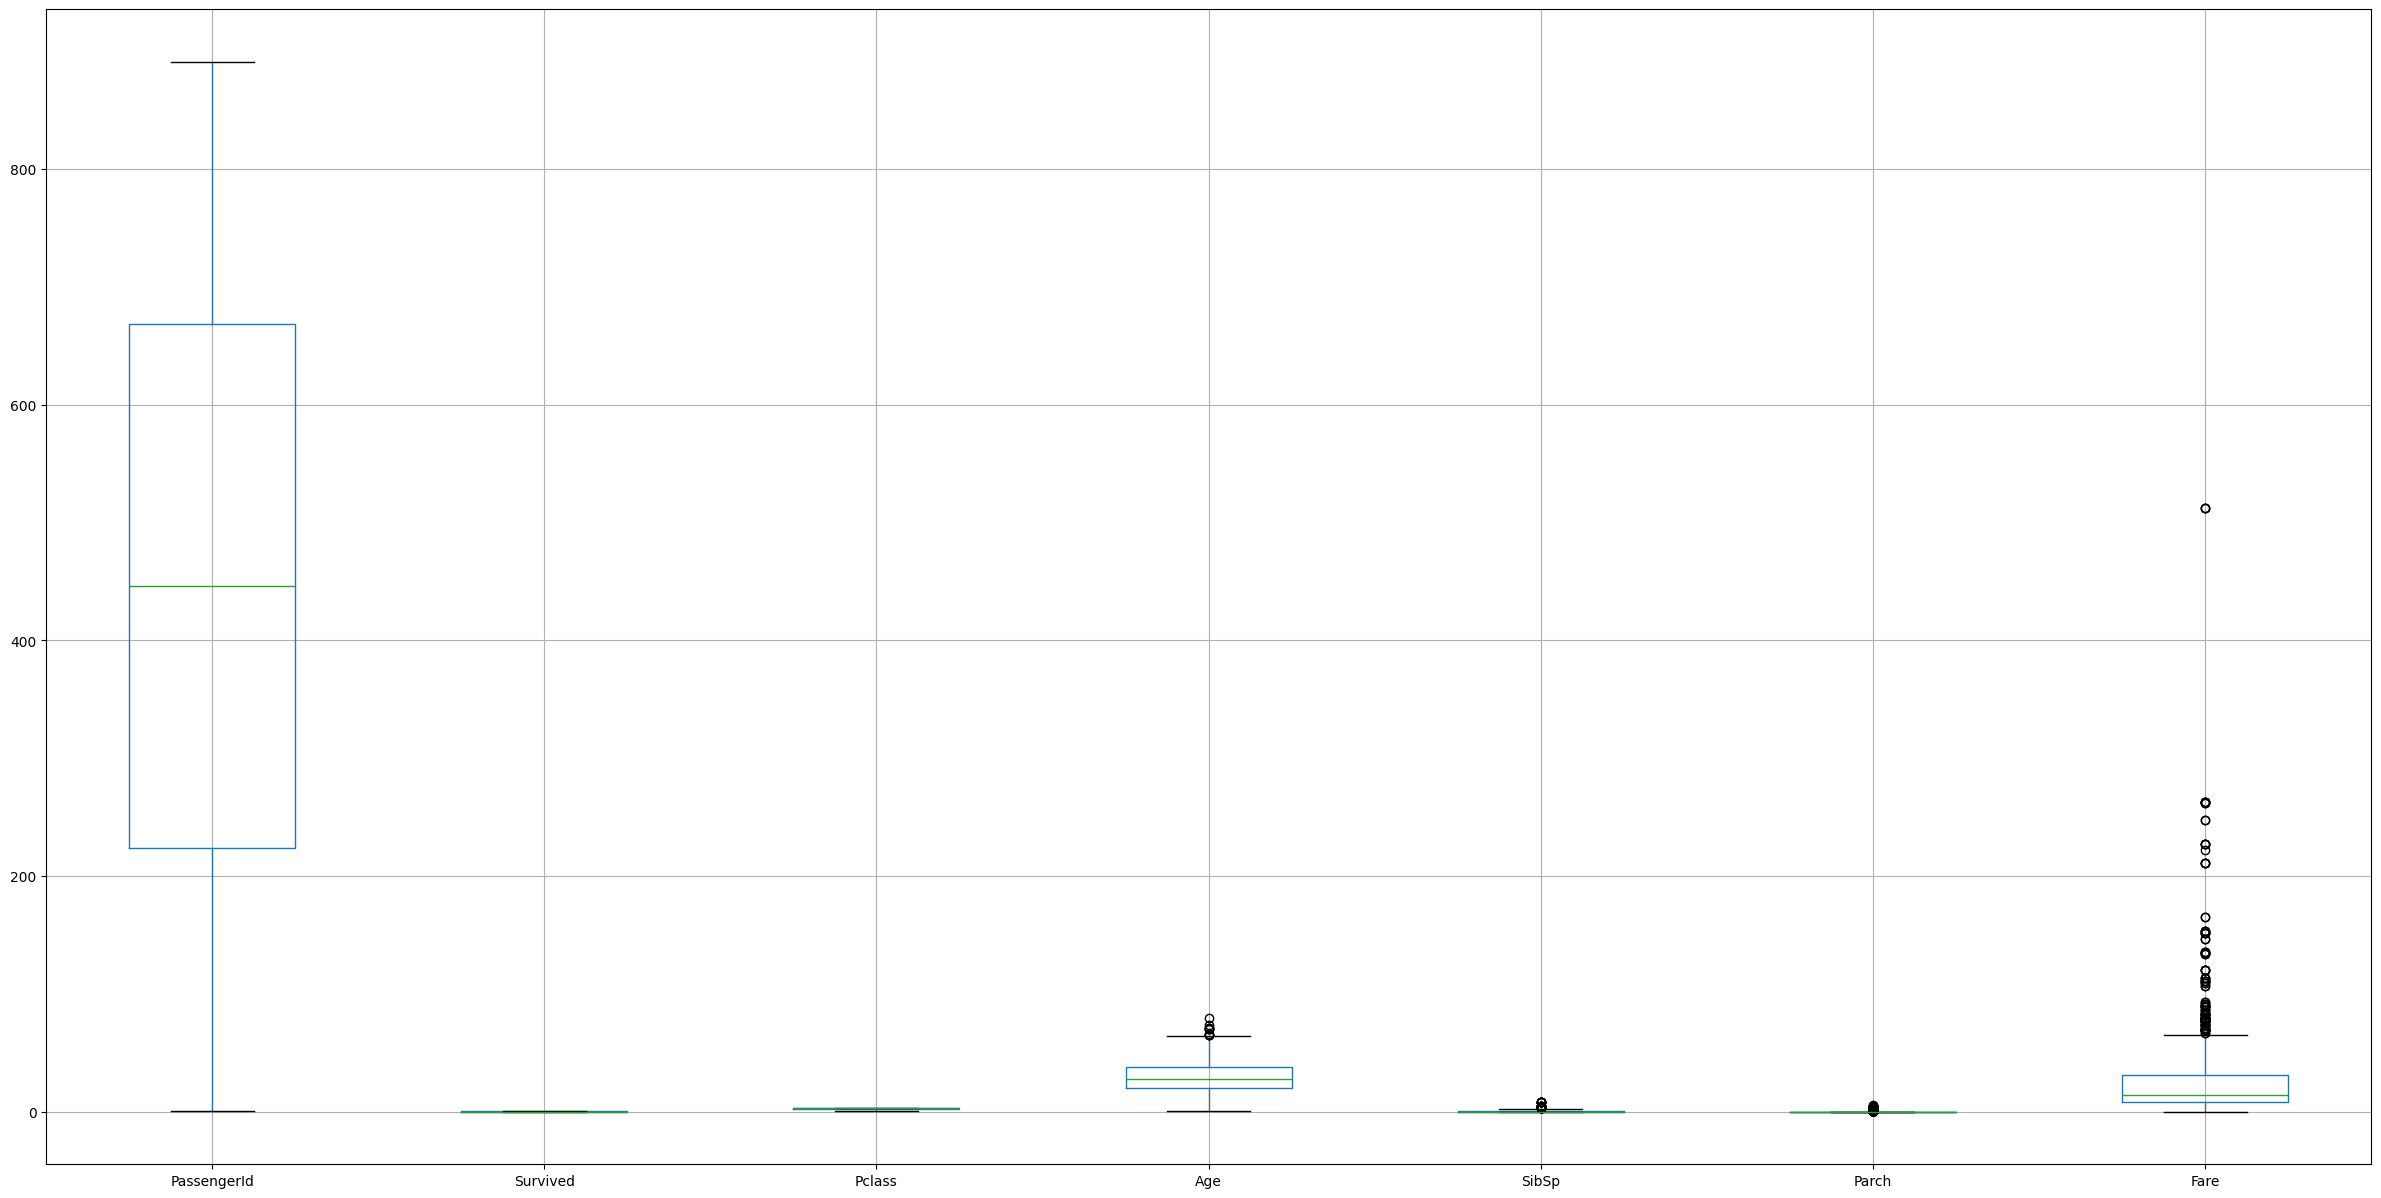

In [30]:
# Enlarged boxplot

titanic_dataset.boxplot(figsize=(30, 15))

In [31]:
# Checking datatypes

titanic_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

SURVIVAL

In [32]:
# People that survived

titanic_dataset["Survived"].sum()

342

In [33]:
# Number of males that survived

titanic_dataset.groupby("Survived").sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,245412,1390,"Braund, Mr. Owen HarrisAllen, Mr. William Henr...",malemalemalemalemalemalemalefemalemalefemalema...,12985.50,304,181,A/5 2117137345033087717463349909A/5. 215134708...,12142.7199,E46C23 C25 C27B30C83F G73E31A5D26C110B58 B60D2...,SSQSSSSSQSSSCSSCSCSSSSSCSQCSSSCCSCSSCSSSSSCSSS...
1,151974,667,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femalefemalefemalefemalefemalefemalefemalefema...,8219.67,162,159,PC 17599STON/O2. 3101282113803347742237736PP 9...,16551.2294,C85C123G6C103D56A6B78D33C52B28F33C23 C25 C27D1...,CSSSCSSSSCSQSSQCQCCCQQCSSSSCSSSSSSQSSSCSSSQSCS...


In [34]:
titanic_dataset.groupby("Sex").sum()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,135343,233,678,"Cumings, Mrs. John Bradley (Florence Briggs Th...",7286.00,218,204,PC 17599STON/O2. 3101282113803347742237736PP 9...,13966.6628,C85C123G6C103B78D33B28F33C23 C25 C27E101F E69D...,CSSSCSSSSSCQSSQCQSCSSCQQSCSSSSSSSQSSSSSSQCSCSS...
male,262043,109,1379,"Braund, Mr. Owen HarrisAllen, Mr. William Henr...",13919.17,248,136,A/5 2117137345033087717463349909A/5. 215134708...,14727.2865,E46D56A6C23 C25 C27B30C52C83F G73E31A5D10 D12D...,SSQSSSSQSSSSCSSCSCSCSCSQCSSCSCSCSSCCSSSSCSSSSS...


In [35]:
titanic_dataset.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [36]:
titanic_dataset.groupby('Survived')['Sex'].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

In [37]:
# Average male and females that survived

titanic_dataset.groupby('Sex')["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64